#  Лабораторная работа №3.4.1


## Выполнил Усеинов Булат

### Группа 778

In [2]:
import math
import numpy as np
import pandas as pd
from scipy import interpolate
from matplotlib import pyplot as plt

#### Объявим приборные погрещшности величин в эксперименте

In [21]:
delta_I = 0.01
delta_m = 1 * (10**(-6))
delta_Phi = 0.0001
delta_B = delta_Phi / 72

## Часть I. Калибровка Электромагнита.

In [4]:
data = pd.DataFrame()
data["I, A"] = [0.13, 0.26, 0.39, 0.52, 0.65, 0.78, 0.91, 1.16]
data["Ф, Вб"] = [0.8, 1.5, 2.2, 2.6, 3., 3.3, 3.6, 3.9]
data

,"I, A","Ф, Вб"
0,0.13,0.8
1,0.26,1.5
2,0.39,2.2
3,0.52,2.6
4,0.65,3.0
5,0.78,3.3
6,0.91,3.6
7,1.16,3.9


### Рассчитаем B по формуле:
$$B = \frac{\Phi}{SN}$$

In [5]:
print("SN = ", 72)

SN =  72


In [6]:
data["B, Тл"] =  (data["Ф, Вб"] ) / 72.
data

,"I, A","Ф, Вб","B, Тл"
0,0.13,0.8,0.011111
1,0.26,1.5,0.020833
2,0.39,2.2,0.030556
3,0.52,2.6,0.036111
4,0.65,3.0,0.041667
5,0.78,3.3,0.045833
6,0.91,3.6,0.050000
7,1.16,3.9,0.054167


In [7]:
# Построим калибровочную кривую
f = interpolate.interp1d(data['I, A'], data['B, Тл'], kind='quadratic')

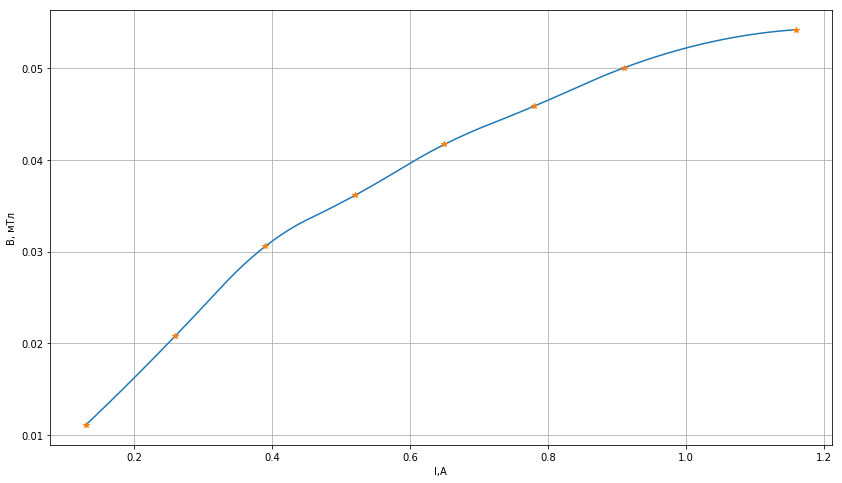

In [8]:
x = np.linspace(0.13, 1.16, 700)
plt.figure(figsize=(14,8))
plt.plot(x, f(x), '-' )
plt.plot(data['I, A'], data['B, Тл'], '*')
plt.xlabel("I,A")
plt.ylabel("B, мТл")
plt.grid()

## Часть II. Эксперимент для меди и алюминия.

In [9]:
g = 9.8155
data["m_Cu, mg"] = [0., -2., -4., -6., -10., -13., -15., -24.]
data["m_Al, mg"] = [2., 6, 11., 19., 24., 27., 33., 44.]
data["|dP_Cu|, N"] = data["m_Cu, mg"]*0.000001*g
data["|dP_Al|, N"] = data["m_Al, mg"]*0.000001*g
data["B**2, Тл**2"] = ((data["B, Тл"])**2 )*100
data

,"I, A","Ф, Вб","B, Тл","m_Cu, mg","m_Al, mg","|dP_Cu|, N","|dP_Al|, N","B**2, Тл**2"
0,0.13,0.8,0.011111,0.0,2.0,0.000000,0.000020,0.012346
1,0.26,1.5,0.020833,-2.0,6.0,-0.000020,0.000059,0.043403
2,0.39,2.2,0.030556,-4.0,11.0,-0.000039,0.000108,0.093364
3,0.52,2.6,0.036111,-6.0,19.0,-0.000059,0.000186,0.130401
4,0.65,3.0,0.041667,-10.0,24.0,-0.000098,0.000236,0.173611
5,0.78,3.3,0.045833,-13.0,27.0,-0.000128,0.000265,0.210069
6,0.91,3.6,0.050000,-15.0,33.0,-0.000147,0.000324,0.250000
7,1.16,3.9,0.054167,-24.0,44.0,-0.000236,0.000432,0.293403


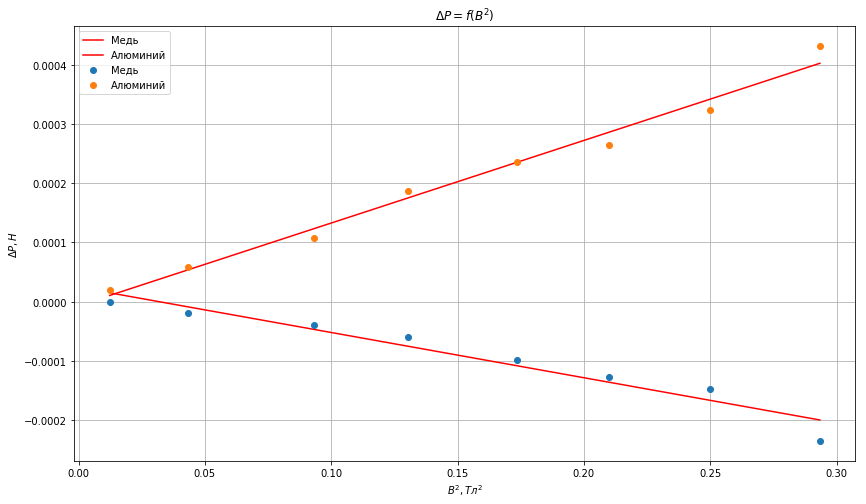

In [15]:
plt.figure(figsize=(14,8))
plt.title(r'$\Delta P = f(B^2)$')
A = np.vstack([data["B**2, Тл**2"], np.ones(len(data["B**2, Тл**2"]))]).T
b_Cu, a_Cu = np.linalg.lstsq(A, data["|dP_Cu|, N"], rcond = None)[0]
plt.plot(data["B**2, Тл**2"],b_Cu*data["B**2, Тл**2"] + a_Cu, 'r', label = 'Медь')
A = np.vstack([data["B**2, Тл**2"], np.ones(len(data["B**2, Тл**2"]))]).T
b_Al, a_Al = np.linalg.lstsq(A, data["|dP_Al|, N"], rcond = None)[0]
plt.plot(data["B**2, Тл**2"],b_Al*data["B**2, Тл**2"] + a_Al, 'r', label = 'Алюминий')
plt.plot(data["B**2, Тл**2"], data["|dP_Cu|, N"], 'o', label = 'Медь' )
plt.plot(data["B**2, Тл**2"], data["|dP_Al|, N"], 'o', label = 'Алюминий')
plt.grid()
plt.xlabel(r"$B^2, Тл^2 $")
plt.ylabel(r"$\Delta P, Н$")
plt.legend();

### Рассчитаем погрешность наклонов по МНК:


In [1]:
sum1 = 0.
sum2 = 0.
sum3 = 0.
sum4 = 0.
for i in range(8):
    sum1 += (data["|dP_Cu|, N"][i] - b_Cu * data["B**2, Тл**2"][i] - a_Cu )**2
    sum2 += (data["B**2, Тл**2"][i] - np.mean(data["B**2, Тл**2"]))**2
    sum3 += (data["|dP_Al|, N"][i] - b_Al * data["B**2, Тл**2"][i] - a_Al )**2
    sum4 += (data["B**2, Тл**2"][i] - np.mean(data["B**2, Тл**2"]))**2
delta_p_cu = np.sqrt(sum1 / (7 * sum2))
delta_p_al = np.sqrt(sum3 / (7 * sum4))
print("Медь = {:.4} \pm".format(b_Cu),round(delta_p_cu, 4) )
print("Алюминий = {:.4} \pm".format(b_Al),round(delta_p_al, 4) )

NameError: name 'data' is not defined

In [19]:
d_Cu = 0.01
d_Al = 0.01
S_Cu = (np.pi * (d_Cu**2))/4
S_Al = S_Cu
mu_0 = 1.256 * (10**(-6)) 


### Определим $\chi$ по формуле : $$\chi = \frac{\Delta P}{B^2}\cdot \frac{2 \mu_0}{s}$$где $M = \chi \cdot H$, причем $\frac{|\Delta P|}{B^2}$ есть наклон построенного графика 

In [26]:
# Определим Хи и его погрешность
delta_chi_cu = delta_p_cu * (mu_0/S_Cu)
delta_chi_al = delta_p_al * (mu_0/S_Cu)

chi_Cu = b_Cu *(mu_0/S_Cu)
chi_Al = b_Al *(mu_0/S_Cu)
print("chi_Cu = {:.4} +- {:.4}".format(chi_Cu,delta_chi_cu))
print(r"chi_Al = {:.4} +- {:.4}".format(chi_Al,delta_chi_al))

chi_Cu = -1.221e-05 +- 1.153e-06
chi_Al = 2.23e-05 +- 1.062e-06


## Получим значения коэффициентов $\chi_{Al} = (2.2 \pm 0.1)\cdot 10^{-5}$ и $\chi_{Cu} = (-1.2 \pm 0.1  )\cdot 10^{-5}$

### Формулы для расчета погрешностей в этой работе:

$$S_{\Delta P} = \sqrt{\frac{1}{n-1}\cdot(\frac{\Sigma(y_i-bx_i-a)^2}{\Sigma(x_i-\overline x)^2})}$$